Autor: Gabriel de Sousa Botelho

Formação: Cientista da Computação pela UFC

Contato:
  
  📧 gabrielsbotelho12@gmail.com
  
  👉 [LinkedIn](https://www.linkedin.com/in/gabriel-botelhoo/)
  
  👉 [Github](https://github.com/GabrielSBotelho)

# Projeto Random Forest

## Importando Bibliotecas e dados

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Importando os 2 dataset
path_red_wine = '/content/drive/MyDrive/Data Science/Dados/Wine Quality/winequality-red.csv'
path_white_wine = '/content/drive/MyDrive/Data Science/Dados/Wine Quality/winequality-white.csv'

In [ ]:
data_red_wine = pd.read_csv(path_red_wine, sep=';')
data_white_wine = pd.read_csv(path_white_wine, sep=';')

In [ ]:
print(data_red_wine.shape, data_white_wine.shape)

(1599, 12) (4898, 12)


In [ ]:
# Concatenando os datasets
all_data = pd.concat([data_red_wine, data_white_wine], axis=0, ignore_index=True)
all_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [ ]:
all_data['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [ ]:
all_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
all_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


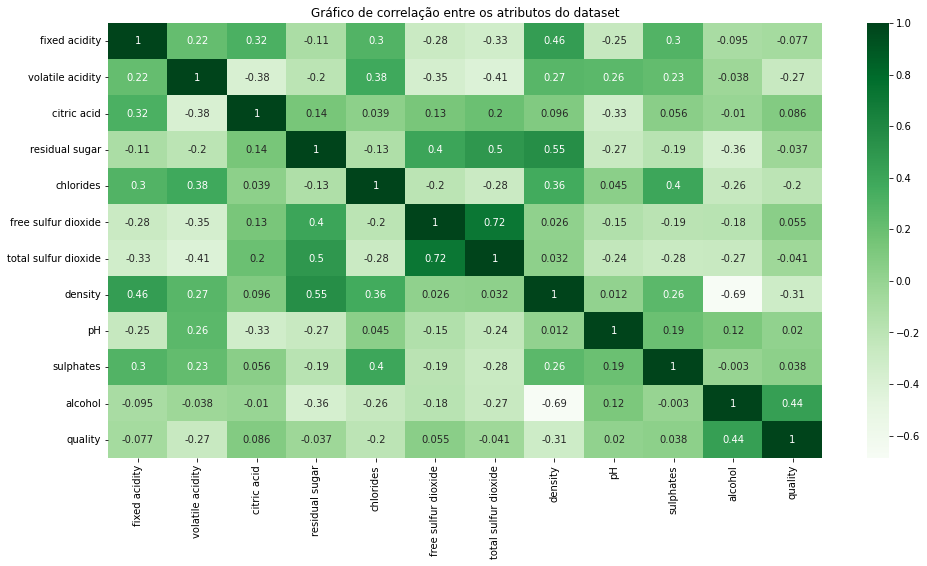

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Gráfico de correlação entre os atributos do dataset')
sns.heatmap(all_data.corr(), annot = True, cmap = 'Greens')

plt.show()

## EDA

EDA Questions (TODO)

* Qual o teor médio de álcool dos vinhos por categoria? Qual o teor médio de álcool do vinho que tem qualidade 8 ou 9? E dos que foram avaliado com qualidade 3 ou 4?

* Qual o teor médio de açúcar residual dos vinhos por categoria? Qual o teor médio de açúcar residual do vinho que tem qualidade 8 ou 9? E dos que foram avaliado com qualidade 3 ou 4?

* Qual o teor médio de ácido cítrico dos vinhos por categoria? Qual o teor médio de ácido cítrico do vinho que tem qualidade 8 ou 9? E dos que foram avaliado com qualidade 3 ou 4?

* Qual o teor médio da acidez volátil dos vinhos por categoria? Qual o teor médio da acidez volátil do vinho que tem qualidade 8 ou 9? E dos que foram avaliado com qualidade 3 ou 4?

In [ ]:
import plotly.express as px

In [ ]:
data = all_data.groupby('quality').mean()
data = data.reset_index()
data

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,3,7.853333,0.517000,0.281000,5.140000,0.077033,39.216667,122.033333,0.995744,3.257667,0.506333,10.215000
1,4,7.288889,0.457963,0.272315,4.153704,0.060056,20.636574,103.432870,0.994833,3.231620,0.505648,10.180093
2,5,7.326801,0.389614,0.307722,5.804116,0.064666,30.237371,120.839102,0.995849,3.212189,0.526403,9.837783
3,6,7.177257,0.313863,0.323583,5.549753,0.054157,31.165021,115.410790,0.994558,3.217726,0.532549,10.587553
4,7,7.128962,0.288800,0.334764,4.731696,0.045272,30.422150,108.498610,0.993126,3.228072,0.547025,11.386006
5,8,6.835233,0.291010,0.332539,5.382902,0.041124,34.533679,117.518135,0.992514,3.223212,0.512487,11.678756
6,9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


In [ ]:
px.bar(data, x='quality', y='alcohol').update_layout(title='Média da porcentagem de álcool dos vinhos em cada categoria')

In [ ]:
px.bar(data, x='quality', y='residual sugar').update_layout(title='Média da porcentagem de açúcar residual dos vinhos em cada categoria')

In [ ]:
px.bar(data, x='quality', y='citric acid').update_layout(title='Média da porcentagem de ácido cítrico dos vinhos em cada categoria')

In [ ]:
px.bar(data, x='quality', y='volatile acidity').update_layout(title='Média da porcentagem da acidez volátil dos vinhos em cada categoria')

## Modelo Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

In [ ]:
# Dividindo os dados indenpendentes e o target
X = all_data.drop('quality', axis=1)
y = all_data['quality']

print(X.shape, y.shape)

(6497, 11) (6497,)


In [ ]:
# Dividindo os dados em treino e test
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [ ]:
#  Criando modelo
rf = RandomForestClassifier(n_estimators=500, max_depth=21, min_samples_leaf=2, random_state=0)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=21, min_samples_leaf=2, n_estimators=500,
                       random_state=0)

In [ ]:
# Obtendo os valores previstos pelo modelo
pred = rf.predict(x_test)
print(pred)

[6 6 6 ... 5 6 7]


In [ ]:
mse = mean_squared_error(y_test, pred)
print(f'O erro quadrático médio é de {np.sqrt(mse)*100:.2f}%')

O erro quadrático médio é de 67.82%


In [ ]:
acc_score = accuracy_score(y_test, pred)
print(f'A acurácia do modelo é de {acc_score*100:.2f}%')

A acurácia do modelo é de 67.38%
